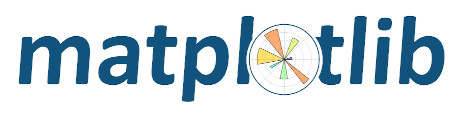

* библиотека `Matplotlib`;
    - основные компоненты
    - дополнительные возможности
* библиотека Seaborn 
    - введение
    - основные параметры
    - построение графиков описательной статистики
* обзор библиотеки `Plotly`

## Библиотека `matplotlib`


Для `Python` разработано несколько пакетов для построения графиков. Один из наиболее популярных $-$ `matplotlib`. Если в `jupyter notebook` выполнить специальную магическую команду `%matplotlib inline`, то графики будут строиться в том же окне браузера. Есть другие варианты, в которых графики показываются в отдельных окнах. Это удобно для трёхмерных графиков $-$ тогда их можно поворачивать мышкой (в случае `inline` графиков это невозможно). Графики можно также сохранять в файлы, как в векторных форматах (`eps`, `pdf`, `svg`), так и в растровых (`png`, `jpg`). `matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков.

Официальная документация по matplotlib - https://matplotlib.org/index.html.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Корректное отображение графиков прямо в jupyter'e
%matplotlib inline
#Все функции matplotlib API, в частности plot и close, находятся в модуле matplotlib.pyplot

### Основные компоненты

`MatPlotLib` очень большая библиотека, но по своей сути она состоит из небольшого количества базовых компонентов: 

<center>
    <img src="img/mpl_anatomy.jpg" width="320px">
</center>

Объект `Figure` $-$ это контейнер самого верхнего уровня, та область на которой все нарисовано. Таких областей может быть несколько, каждая из которых может содержать несколько контейнеров `Axes`.

`Axes` $-$ это та область на которой чаще всего и отражаются графики (данные в виде графиков), а так же все вспомогательные атрибуты (линии сетки, метки, указатели и т.д.). Часто, установка этой области сопровождается с вызовом `subplot`, который и помещает `Axes` на регулярную сетку. Поэтому, так же часто `Axes` и `Subplot` можно считать синонимами. Но с тем что это за сетка и как это размещение работает, давайте разберемся чуть ниже.

Каждая область `Axes` содержит `XAxis` и `YAxis`. Они содержат, деления, метки и прочие вспомогательные атрибуты. 

#### Простые графики

Рисуем график с помощью списка ординат; абциссы образуют последовательность $0$, $1$, $2$, $\dots$

In [ ]:
plt.figure()
plt.plot([0, 1, 0.5])
plt.show()

Два списка: абциссы и ординаты точек. Точки соединяются прямыми, т.е. строится ломаная линия.

In [ ]:
plt.figure()
plt.plot([0, 0.25, 1], [0, 1, 0.5])
plt.show()

Основные функции отрисовки
* `plt.scatter(x, y, params)` $-$ нарисовать точки с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси;
* `plt.plot(x, y, params)` $-$ нарисовать график по точкам с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси. Точки будут соединятся в том порядке, в котором они указаны в этих массивах;
* `plt.fill_between(x, y1, y2, params)` $-$ закрасить пространство между $y_1$ и $y_2$ по координатам из $x$;
* `plt.pcolormesh(x, y, c, params)` $-$ закрасить пространство в соответствии с интенсивностью $c$;
* `plt.contour(x, y, z, lines)` $-$ нарисовать линии уровня. Затем нужно применить `plt.clabel`.


Вспомогательные функции
* `plt.figure(figsize=(x, y))` $-$ создать график размера $(x, y)$;
* `plt.show()` $-$ показать график;
* `plt.subplot(...)` $-$ добавить подграфик;
* `plt.xlim(x_min, x_max)` $-$ установить пределы графика по горизонтальной оси;
* `plt.ylim(y_min, y_max)` $-$ установить пределы графика по вертикальной оси;
* `plt.title(name)` $-$ установить имя графика;
* `plt.xlabel(name)` $-$ установить название горизонтальной оси;
* `plt.ylabel(name)` $-$ установить название вертикальной оси;
* `plt.legend(loc=...)` $-$ сделать легенду в позиции loc;
* `plt.grid()` $-$ добавить сетку на график;
* `plt.savefig(filename)` $-$ сохранить график в файл.

http://matplotlib.org/gallery.html $-$ тысячи примеров

У функций в `matplotlib` много параметров.
Для того, чтобы посмотреть все параметры, можно воспользоваться справкой, например,

`plt.plot?`

Когда точек много, ломаная неотличима от гладкой кривой.

In [ ]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x))
plt.show()

Функция `scatter` просто рисует точки, не соединяя из линиями.

In [ ]:
plt.figure()
plt.scatter([0, 0.25, 1], [0, 1, 0.5])
plt.show()

Массив $x$ не обязан быть монотонно возрастающим. Можно строить любую параметрическую линию $x=x(t)$, $y=y(t)$.

In [ ]:
t = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(4,4))
plt.plot(np.cos(t), np.sin(t))
plt.show()

Несколько кривых на одном графике. Каждая задаётся парой массивов $-$ $x$ и $y$ координаты. По умолчанию, им присваиваются цвета из некоторой последовательности цветов; разумеется, их можно изменить. Вообще говоря, подобным кодом не стоит пользоваться.

In [ ]:
x = np.linspace(0, 2, 100)

plt.figure()
plt.plot(x, x, x, x**2, x, x**3)
plt.show()

Для простой регулировки цветов и типов линий после пары $x$ и $y$ координат вставляется форматная строка. Первая буква определяет цвет (`'r'` $-$ красный, `'b'` $-$ синий и т.д.), дальше задаётся тип линии (`'-'` $-$ сплошная, `'--'` $-$ пунктирная, `'-.'` $-$ штрих-пунктирная и т.д.).

In [ ]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x), 'r-')
plt.plot(x, np.cos(x), 'b--')
plt.show()

Если в качестве "типа линии" указано `'o'`, то это означает рисовать точки кружочками и не соединять их линиями; аналогично, `'s'` означает квадратики. Конечно, такие графики имеют смысл только тогда, когда точек не очень много.

In [ ]:
x = np.linspace(0, 1, 11)

plt.figure()
plt.plot(x, x ** 2, 'ro')
plt.plot(x, 1 - x, 'gs')
plt.show()

Рассмотрим пример настройки отображения вывода графиков. Можно задать последовательность засечек на осях абцисс и ординат, вывести подписи к ним, в которых, как и в других текстах, можно использовать $\LaTeX$-овские обозначения. Задать надписи на осях абцисс и ординат, указать заголовок графика. Во всех текстовых элементах можно задать размер шрифта, толщину линий и штрихи.

В примере ниже, на графике косинуса, рисуется штрих длины $8$, потом участок длины $4$ не рисуется, потом участок длины $2$ рисуется, потом участок длины $4$ опять не рисуется, и так по циклу; поскольку толщина линии равна $2$, эти короткие штрихи длины $2$ фактически выглядят как точки. Можно задать подписи к кривым (`legend`); где разместить эти подписи тоже можно регулировать.

In [ ]:
x = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(10, 5))
plt.plot(x, np.sin(x),
         linewidth=2, color='g', dashes=[8, 4], label=r'$\sin x$')
#raw string
plt.plot(x, np.cos(x),
         linewidth=2, color='r', dashes=[8, 4, 2, 4], label=r'$\cos x$')
plt.axis([0, 2 * np.pi, -1, 1])
plt.xticks(np.linspace(0, 2 * np.pi, 9),  # Где сделать отметки
           ('0',r'$\frac{1}{4}\pi$',r'$\frac{1}{2}\pi$',  # Как подписать
            r'$\frac{3}{4}\pi$',r'$\pi$',r'$\frac{5}{4}\pi$',
            r'$\frac{3}{2}\pi$',r'$\frac{7}{4}\pi$',r'$2\pi$'),
           fontsize=20)
plt.yticks(fontsize=12)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)
plt.title(r'$\sin x$, $\cos x$', fontsize=20)
plt.legend(fontsize=20, loc=0)
plt.show()

##### Пример

Построить пунктирный график функции $y = x^3$. Подписать оси, заголовок и легенду. 

In [ ]:
x = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.plot(x, x**3, linestyle='--', lw=2, label='$y=x^3$')
plt.xlabel('x'), plt.ylabel('y')
plt.legend()
plt.title('График кубической функции')
plt.grid(ls=':')
plt.show()

#### Несколько рисунков на одном `Figure`

На одном объекте `Figure`, при помощи метода `.add_subplot()` можно построить несколько графиков.

<img width = '400px' ALIGN='left' src="images/lesson_4/5179abf54c6fbad394dfef5ec2817828.png">

In [ ]:
fig = plt.figure() #все рисунки существуют внутри объекта figure,инициализация фигуры
ax1 = fig.add_subplot(221) # подграфик в разметке 2*2 на 1 место
ах2 = fig.add_subplot(222) # разметка 2*2 на 2 место
ax3 = fig.add_subplot(223) # разметка 2*2 на 3 место
ax4 = fig.add_subplot(224)  

# If you are creating many figures, make sure you explicitly call "close"
# on the figures you are not using, because this will enable pylab
# to properly clean up the memory.

Разметка 2 строки $\times$ 1 столбец, 2 место

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ах2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(212)

Заполнение посторочной разметки 1 строка, 2 столбца

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ах2 = fig.add_subplot(122)
ax3 = fig.add_subplot(223)   

In [ ]:
from numpy.random import randn

In [ ]:
fig = plt.figure(figsize= (14,5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(122) 
ax3 = fig.add_subplot(223)   

plt.plot(randn(100).cumsum(), 'k--') # отрисовка
# Метод fig.add_subplot возвращает объект AxesSubplot, что позволяет рисовать в любом подrрафике, вызывая методы этого объекта:
f = ax1.hist(randn(100), bins=20, color='y', alpha=0.9)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30)) 

### Дополнительные возможности


Если $y$ меняется на много порядков, то удобно использовать логарифмический масштаб по $y$.

In [ ]:
x = np.linspace(-5, 5, 100)

plt.figure()
plt.plot(x, np.exp(x) + np.exp(-x))
plt.yscale('log')
plt.yticks(fontsize=15)
plt.show()

Можно задать логарифмический масштаб по обоим осям.

In [ ]:
x = np.logspace(-2, 2, 100)

plt.figure()
plt.plot(x, x + x ** 3)
plt.xscale('log'), plt.xticks(fontsize=15)
plt.yscale('log'), plt.yticks(fontsize=15)
plt.show()

#### Полярные координаты

Первый массив — $\varphi$, второй — $r$. Спираль Архимеда.

In [ ]:
t = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.polar(t, t)
plt.show()

График кардиоды в полярной системе координат.

In [ ]:
phi = np.linspace(0, 2 * np.pi, 400)

plt.figure()
plt.polar(phi, 2 * (1 - np.cos(phi)))
plt.show()

#### Контурные графики

Пусть мы хотим изучить поверхность $z=xy$. Вот её горизонтали.

In [ ]:
x = np.linspace(-1, 1, 50)
y = x
z = np.outer(x, y)

plt.figure(figsize=(5,5))
plt.contour(x, y, z)
plt.show()

Количество контуров можно увеличить передачей массива уровней.

In [ ]:
plt.figure(figsize=(5,5))
curves = plt.contour(x, y, z, np.linspace(-1, 1, 11))
plt.clabel(curves)
plt.title(r'$z=xy$', fontsize=20)
plt.show()

С ледующем примере высота передаётся цветом, как на физических географических картах. Функция `colorbar` показывает соответствие цветов и значений $z$.

In [ ]:
plt.figure(figsize=(5,5))
plt.contourf(x, y, z, np.linspace(-1, 1, 11))
plt.colorbar()
plt.show()

#### Трёхмерная линия

Задаётся параметрически: $x=x(t)$, $y=y(t)$, $z=z(t)$.

In [ ]:
t = np.linspace(0, 4 * np.pi, 100)
x = np.cos(t)
y = np.sin(t)
z = t / (4 * np.pi)

In [ ]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot(x, y, z)

Для `Axes3D` можно задать угол обзора.

In [ ]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.elev, ax.azim = 45, 30#высота и азимут
fig.add_axes(ax)
ax.plot(x, y, z)
plt.show()

#### Поверхности

Все поверхности параметрические: $x=x(u,v)$, $y=y(u,v)$, $z=z(u,v)$. Если мы хотим построить явную поверхность $z=z(x,y)$, то удобно создать массивы $x=u$ и $y=v$ функцией `meshgrid`.

In [ ]:
X = 10
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r) / r

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.plot_surface(x, y, z, rstride=10, cstride=10)
fig.add_axes(ax)
plt.show()

Есть много встроенных способов раскраски поверхностей. Так, в методе `gnuplot` цвет зависит от высоты $z$.

In [ ]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='gnuplot')
fig.add_axes(ax)
plt.show()

Построение тора, параметрической поверхности с параметрами $\theta$, $\varphi$.

In [ ]:
t = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(t, t)
r = 0.2
x, y, z = (
            (1 + r * np.cos(phi)) * np.cos(theta),
            (1 + r * np.cos(phi)) * np.sin(theta),
            r * np.sin(phi)
        )

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
ax.elev = 45
ax.plot_surface(x, y, z, rstride=2, cstride=1)
fig.add_axes(ax)
plt.show()

#### Загрузка изображений

Можно загрузить картинку из файла.
Это будет обычный `numpy.array`.
По последней координате цвета RGB и прозрачность.

In [ ]:
picture = plt.imread('bumblebee.png')
print(type(picture), picture.shape)

plt.imshow(picture)
plt.axis('off')
plt.show()

## Библиотека Seaborn

### Введение

[Seaborn](https://seaborn.pydata.org/) &mdash; популярная библиотека готовых шаблонов для статистической визуализации, написанная на бэкенде `matplotlib`. Две основные причины не проходить мимо:
1. Выразительный высокоуровневый интерфейс: построение большинства простых графиков происходит в одну строчку кода.
2. Более эстетичные графики: часто встроенные в `seaborn` стили достаточно хороши и без вашего вмешательства.

Автор seaborn &mdash; [Michael Waskom, PhD](https://www.cns.nyu.edu/~mwaskom/), сотрудник [Center for Neural Research](https://www.cns.nyu.edu/home.php) (Нью-Йорк), выпускник Стэнфорда. Разработка seaborn это его хобби, которое делает жизни тысяч людей чуть лучше.

**Малоизвестный факт:** библиотека названа в честь [Сэмюела Нормана Сиборна](https://en.wikipedia.org/wiki/Sam_Seaborn) (S.N.S. &mdash; именно поэтому `import seaborn as sns`), героя сериала [The West Wing](https://en.wikipedia.org/wiki/The_West_Wing), "один из самых важных телесериалов в истории по версии журнала Times". Таким образом автор отдал дань уважения любимому сериалу. [Свидетельство](https://github.com/mwaskom/seaborn/issues/229) можно найти среди issues в репозитории проекта.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Пример

Рассмотрим изображение графиков нескольких смещенных синусоид с разными амплитудами при помощи `matplotlib` и изменим их дизайн с помощью `seaborn`.

In [ ]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

In [ ]:
sinplot()

### Основные параметры

#### Стили

Установка стиля графиков:

`sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)`

* `context` &mdash; параметры контекста, влияет на размер меток, линий и других элементов, но не на общий стиль. Контекст: `notebook`, `paper`, `talk`, `poster`;
* `style` &mdash; стиль осей: `darkgrid` (серый фон с сеткой), `whitegrid` (белый фон с сеткой), `dark` (серый фон без сетки), `white`  (белый фон без сетки), `ticks`;
* `palette` &mdash; цветовая палитра: `deep`, `muted`, `bright`, `pastel`, `dark`, `colorblind`, а так же палитры из `matplotlib`;
* `font` &mdash; шрифт текста;
* `font_scale` &mdash; масштабирование размера текста.

Представим вид графиков для разных контекстов:

In [ ]:
plt.figure(figsize=(15, 9))
for i, context in enumerate(['notebook', 'paper', 
                             'talk', 'poster']):
    sns.set(context=context)  # Устанавливаем стиль
    plt.subplot(2, 2, i+1)
    sinplot()
    plt.title(context)

Демонстрация различных стилей

In [ ]:
plt.figure(figsize=(15, 12))
for i, style in enumerate(['darkgrid', 'whitegrid', 
                           'dark', 'white', 'ticks']):
    sns.set(style=style)  # Устанавливаем стиль
    plt.subplot(3, 2, i+1)
    sinplot()
    plt.title(style)

`seaborn` позволяет убрать любую из четырёх сторон рамки, обрамляющей объект `Figure`.
Реализовать подобную функциональность в рамках `matplotlib` [нетривиально](https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame).

`sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)`
* `fig` &mdash; фигура `matplotlib`. Если `None`, то текущая;
* `top`, `right`, `left`, `bottom` &mdash; указатели границ. Левую и нижнюю оставляют, т.к. вдоль них расположены метки на координатных осях.

In [ ]:
sns.set(style='white')
sinplot()
sns.despine()

При использовании `sns.set` изменяются глобальные переменные, поэтому все последующие графики отрисовываются в том же стиле. Подобные методы целесообразно вызывать в самом начале ноутбука. Во всех остальных ситуациях лучше использовать контекстные менеджеры `sns.plotting_context` и `sns.axes_style` вместо `sns.set`.

In [ ]:
sns.set()

In [ ]:
with sns.plotting_context("notebook"), sns.axes_style("ticks"):
    sinplot()
    sns.despine()

#### Цвета

Используемую палитру можно визуализировать с помощью функции `sns.palplot`. Палитры делятся на несколько следующих типов.

##### Последовательные (sequential)

In [ ]:
sns.palplot(sns.color_palette('viridis', n_colors=10))

In [ ]:
sns.palplot(sns.color_palette('magma', n_colors=10))

In [ ]:
sns.palplot(sns.color_palette('inferno', n_colors=10))

Здесь стоит сделать отступление, т.к. именно с этим типом палитр люди сталкиваются чаще всего. Стандартные последовательные палитры в `seaborn` &mdash; `viridis`, `inferno`, `magma` и другие хороши плавным изменением интенсивности цвета. Они не искажают восприятие и подходят в том числе для дальтоников. О том, как индустрия пришла к своим палитрам, можно узнать в [видеолекции с SciPy 2015](https://www.youtube.com/watch?list=PLYx7XA2nY5Gcpabmu61kKcToLz0FapmHu&v=xAoljeRJ3lU) &mdash; ежегодной всемирной конференции энтузиастов библиотеки `scipy`. 

##### Расходящиеся (diverging)

In [ ]:
sns.palplot(sns.color_palette('coolwarm', n_colors=10))

In [ ]:
sns.palplot(sns.color_palette('rainbow', n_colors=10))

В прошлом большой популярностью пользовалась палитра `jet`, очень похожая на `rainbow`. Более того, долгое время это была палитра по умолчанию в matplotlib. Тем не менее, от `jet` отказались: выяснилось, что она искажает восприятие картинки из-за неравномерной интенсивности отдельных цветов палитры. Есть [любопытная статья](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/), в которой подробно поясняются причины такого решения.

И теперь, даже если просто попытаться отрисовать её, интерпретатор сгенерирует исключение `ValueError` с текстом "No". 

In [ ]:
sns.palplot(sns.color_palette('jet', n_colors=10))

##### Категориальные (qualitative)

In [ ]:
sns.palplot(sns.color_palette('muted', n_colors=10))

In [ ]:
sns.palplot(sns.color_palette('Set2', n_colors=10))

##### Пользовательские

`seaborn` позволяет создавать пользоватльские палитры: либо на основании имеющихся, либо совсем с нуля.  Например, создание палитры из десяти оттенков оранжевого.

In [ ]:
sns.palplot(sns.dark_palette("xkcd:blood orange", n_colors=10))

Обратим внимание на неожиданный формат цвета. В 2010 году популярный онлайн-комикс [xkcd](https://xkcd.com/) провёл [соцопрос](https://blog.xkcd.com/2010/05/03/color-survey-results/), по результатам которого подобрал названия для [954 самых используемых RGB-цветов](https://xkcd.com/color/rgb/). Это упрощает жизнь огромному количеству людей, от дизайнеров до аналитиков и учёных. 

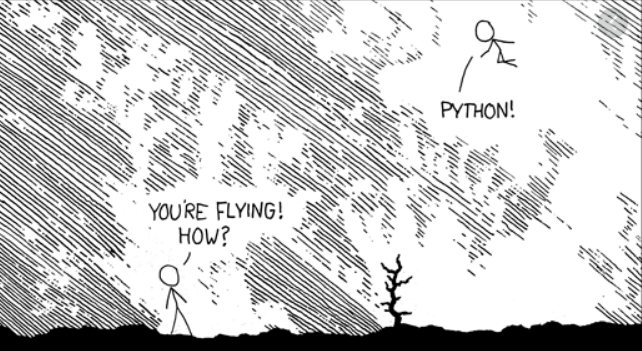

##### Пример

Нарисовать радугу с помощью группы линий.

In [ ]:
count = 100
colors = sns.color_palette('rainbow', count)
layers = np.linspace(1, 2, count)

plt.figure(figsize=(8, 4))
plt.title("Радуга")
# Отрисовка по полуокружностям
for i in np.arange(count):
    nodes_x = np.linspace(-layers[i], layers[i], 100)
    nodes_y = np.sqrt(layers[i]**2 - nodes_x**2)
    sns.lineplot(x=nodes_x, y=nodes_y, color=colors[i])
plt.xticks([])
plt.yticks([])
sns.despine(left=True, bottom=True)

Подробнее о палитрах можно прочитать в [официальной документации](https://seaborn.pydata.org/tutorial/color_palettes.html).

---

Теперь можно перейти и к более практичным примерам. Рассмотрим основные типы графиков, с которыми люди сталкиваются при анализе данных.

### Оценки плотности

Пусть $X = (X_1, ..., X_n)$ &mdash; выборка из непрерывного распределения. 
Выберем
* $q(x)$ &mdash; некоторая "базовая" плотность, называемая **ядром**. Чаще всего в качестве ядра рассматривают плотность нормального распределения $\mathcal{N}(0, I_n)$. 
* $h > 0$ &mdash; величина, отвечающая за масштабирование ядра, называемая **шириной ядра**.

Тогда **ядерной оценкой плотности** (kernel density estimation, KDE) по выборке $X$ называется плотность
$$\widehat{p}_h(x) = \frac{1}{nh}\sum_{i=1}^n q\left(\frac{x-X_i}{h}\right).$$

**Смысл:** в каждую точку выборки поставили отмасштабированное ядро так, будто эта точка — центр ядра, а затем усреднили значения соседних точек с весами, заданными этим ядром. Вместо тысячи слов — [интерактивная иллюстрация](https://mathisonian.github.io/kde/).

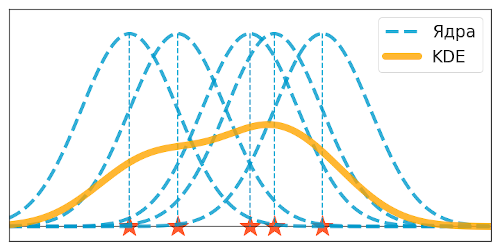

Ядерные оценки плотности — KDE, Kernel Density Estimates — способ что-то понять о распределении, когда о нем нет никакой информации. Такого рода методы называют **непараметрическими**, они иллюстрируют разницу подходов в статистике и теории вероятностей: если в теории вероятности известно распределение и исследуются его свойства, то в статистике зачастую известны только данные, и по их свойствам угадывается распределение.

--------------------

#### Функция `sns.kdeplot`

Построение и отрисовка KDE (в 1D или 2D):

`sns.kdeplot(x, y=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)`

* `x` &mdash; выборка;
* `y` &mdash; вторая координата в двумерном случае;
* `shade` &mdash; закрашивать ли области. В 1D закрашивает область под графиком, в 2D закрашивает области между линиями уровня;
* `vertical` &mdash; повернуть график;
* `kernel` &mdash; метка ядра. В 1D доступны `gau`, `cos`, `biw`, `epa`, `tri`, `triw`; в 2D только гауссовское;
* `bw` &mdash; ширина ядра. Можно указать `scott`, `silverman` или число. В 2D можно указать пару чисел.
* `gridsize` &mdash; размер сетки для отрисовки графика. Влияет только на точность отрисовки, а не на точность оценки плотности;
* `cut` &mdash; задает границы отрисовки kde: график будет нарисован на величину $cut \cdot bw$ от крайних точек выборки;
* `clip` &mdash; нижняя и верхняя граница точек, по которым строится kde. Параметр имеет вид `(low, high)` в 1D и `((low_x, high_x), (low_y, high_y))` в 2D;
* `legend` &mdash; отрисовка легенды;
* `cumulative` &mdash; если `True`, то рисует функцию распределения, соответствующую построенной KDE;
* `shade_lowest` &mdash; нужно ли закрашивать последний контур для 2D. Флаг `False` может быть полезен при отрисовке нескольких kde на одном графике;
* `cbar` &mdash; в 2D добавляет colorbar (шкала цветов);
* `cbar_kws` &mdash; аргументы, соответствующие `fig.colorbar`;
* `kwargs` &mdash; другие аргументы, соответствующие `plt.plot` или `plt.contour`. Например, `color` &mdash; цвет, `cmap` &mdash; цветовая схема, `n_levels` &mdash; количество линий уровня.

#### Функция `sns.histplot`

Гистограмма &mdash; это классический инструмент визуализации, который представляет распределение одной или нескольких переменных путем подсчета количества наблюдений, попадающих в интервалы разбиения.

Эта функция может нормализовать статистику, вычисленную в каждом интервале, для оценки частоты, плотности или вероятностной массы, и может добавлять гладкую кривую, полученную с использованием оценки плотности ядра, аналогично `kdeplot()`.

`seaborn.histplot(data=None, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)`

* `data` &mdash; структура входных данных. Либо набор векторов, который может быть назначен именованным переменным, либо широкий класс данных, которые могут менять размер;
* `x`, `y`, `hue` &mdash; одномерные данные или имена переменных из `data`. Параметр `hue` отвечает за категории данных;
* `weights` &mdash; если предусмотрено, задает веса соответствующих точек данных в каждой ячейке с помощью этих множителей;
* `palette` &mdash; цветовая палитра;
* `kde` &mdash; рисовать ли kde;
* `bins` &mdash; количество интервалов разбиения;
* `kde_kws`, `line_kws` &mdash; словари параметров `kdeplot()` и `matplotlib.axes.Axes.plot()`.

Для демонстрации построения гистограм будем использовать, встроенный в `seaborn`, `dataset` `penguins`.

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

Эти данные о трех видах пингвинов и содержат следующую информацию:

- `species` &mdash; информация о виде пингвина;

- `island` &mdash; название острова в архипелаге Палмера;

- `bill_length_mm` &mdash; длина клюва в **мм**;

- `bill_depth_mm` &mdash; толщина клюва в **мм**;
    
- `flipper_length_mm` &mdash; длина крыла в **мм**;

- `body_mass_g` &mdash; масса тела в **граммах**;

- `sex` &mdash; пол особи.


Построим гистограмму какой-нибудь величины из этой таблицы, например, гистограмму длины крыла. Также отобразим ядерную оценку плотности.

In [ ]:
sns.displot(x='flipper_length_mm', kde=True, data=penguins)

Судя по гистограмме, мы имеем дело с несколькими распределениями, ведь наверняка, длина крыльев зависит от вида пингвина. Что бы узнать это, можно выделить подмножества данных с помощью цвета. Для этого нужно передать параметру `hue` соответствующий столбец для группировки данных по его значениям.

In [ ]:
sns.displot(x='flipper_length_mm',
            kde=True, hue='species',
            data=penguins)

Для визуализации гистограмм нескольких подмножеств, можно использовать и многосегментные графики, которые на самом деле и призвана строить функция `displot()`. Для этого нужно передать столбец с категориальными данными не параметру `hue`, а параметру `col` (или `row`): 

In [ ]:
sns.displot(x='flipper_length_mm', col='species', data=penguins)

Многомерная оценка плотности

In [ ]:
x, y = sps.multivariate_normal(cov=[[2, 1], [1, 2]]).rvs(size=1000).T

plt.figure(figsize=(12, 7))
plt.title(r"Ядерная оценка плотности $\mathcal{N}(\mathbf{0}, \mathbf{\Sigma})$")
sns.kdeplot(x=x, y=y, n_levels=15, shade=True, cmap="magma");

#### Ирисы Фишера

Теперь более интересный пример. Загрузим датасет Ирисы Фишера — [классический учебный датасет](https://en.wikipedia.org/wiki/Iris_flower_data_set), который встроен в `seaborn`.

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris **setosa**), Ирис виргинский (Iris **virginica**) и Ирис разноцветный (Iris **versicolor**). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

- Длина наружной доли околоцветника (англ. sepal length);
- Ширина наружной доли околоцветника (англ. sepal width);
- Длина внутренней доли околоцветника (англ. petal length);
- Ширина внутренней доли околоцветника (англ. petal width).

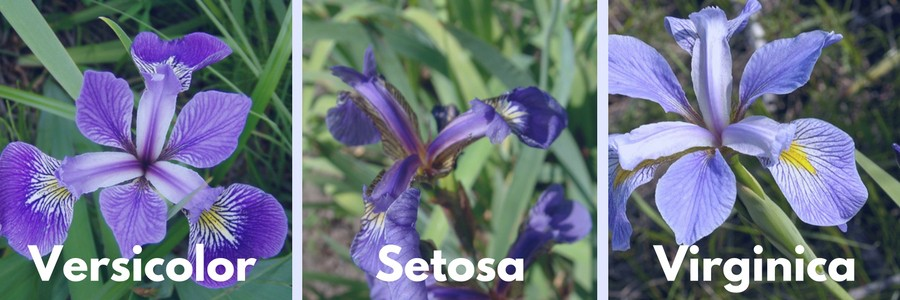

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

Выделим отдельные таблицы под каждый тип цветка

In [ ]:
setosa = iris.loc[iris.species == 'setosa']
virginica = iris.loc[iris.species == 'virginica']
versicolor = iris.loc[iris.species == "versicolor"]

Построим для них ядерную оценку плотности

In [ ]:
plt.figure(figsize=(12, 8))
with sns.axes_style("darkgrid"):
    ax = sns.kdeplot(x=setosa.sepal_length, y=setosa.sepal_width, 
                     label="setosa", cmap='Blues')
    ax = sns.kdeplot(x=versicolor.sepal_length, y=versicolor.sepal_width, 
                     label="versicolor", cmap='Greens')
    ax = sns.kdeplot(x=virginica.sepal_length, y=virginica.sepal_width, 
                     label="virginica", cmap='Reds')
    ax.set_title("Ирисы Фишера")

### `Boxplot`

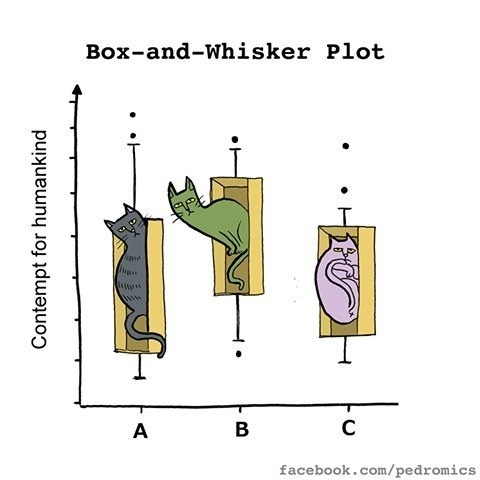

`Boxplot` &mdash; график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

`seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)`

* `x`, `y`, `hue` &mdash; одномерные данные или имена переменных из `data`. Параметр `hue` отвечает за категории данных;
* `data` &mdash; данные;
* `orient`: `"v"` | `"h"` &mdash; ориентация (вертикальная или горизонтальая);
* `color` и `palette` &mdash; задают цвет.

-------------

Простой пример:

In [ ]:
data = sps.norm.rvs(size=(1000, 6)) + np.arange(6) / 2#выборка
#из нормально распределенной генеральной совокупности
plt.figure(figsize=(8, 7))
sns.boxplot(data=data, palette='Set2');

Загрузим `dataset` `tips`, который встроен в `seaborn`. Изначально `dataset` составлен официантом, который записывал информацию о каждых чаевых, который он получал в течение нескольких месяцев работы в ресторане. Имена переменных:
* `total_bill` &mdash; общая сумма счета;
* `tip` &mdash; сумма чаевых;
* `sex` &mdash; пол клиента;
* `smoker` &mdash; курящий ли клиент;
* `day` &mdash; день недели (официант работал не все дни);
* `time` &mdash; время дня;
* `size` &mdash; количество людей в компании клиента.

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

С помощью box plot визуализируем зависимость общей суммы счета от дня недели.

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.boxplot(x='day', y='total_bill', data=tips, palette='Set3')
plt.ylabel('Сумма счета')

plt.subplot(122)
sns.boxplot(x='day', y='tip', data=tips, palette='Set3')
plt.ylabel('Размер чаевых')

Продемонстрируем ту же зависимость сгруппированную по двум группам, определяемых столбцом `smoker`, который передадим в аргумент `hue`. Для удобства сравнения результата между группами, их ящики рисуются рядом.

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
ax = sns.boxplot(x='day', y='total_bill', hue='smoker', 
                 data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Сумма счета')

plt.subplot(122)
ax = sns.boxplot(x='day', y='tip', hue='smoker', 
            data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Размер чаевых');

Продемонстрируем зависимость суммы счета от пола

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
ax = sns.boxplot(x='day', y='total_bill', hue='sex', 
                 data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Сумма счета')

plt.subplot(122)
ax = sns.boxplot(x='day', y='tip', hue='sex', 
            data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Размер чаевых');

### Темы сетки

Сравним стили сеток.

In [ ]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2
plt.figure(figsize=(15, 7))

with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
    plt.subplot(121)
    sns.boxplot(data=data, palette='Set2')
    
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    plt.subplot(122)
    sns.boxplot(data=data, palette='Set2');

Теперь выполним сравнение тем на обычных графиках.

In [ ]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2
plt.figure(figsize=(15, 5))

with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
    plt.subplot(121)
    sinplot()
    
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    plt.subplot(122)
    sinplot()

##### Общие рекомендации

-------------

* Тему `darkgrid` стоит применять для "легких" графиков (точки, линии), поскольку белый цвет сетки на сером фоне помогает избежать конфликта сетки с линиями, представляющими данные. 
* Темы `white` и `whitegrid` похожи, но лучше подходят для графиков с "тяжелыми элементами" (например, закрашенные области).

-------------

### Violin plot

Некоторая комбинация boxplot и ядерной оценки плотности. Внутри облака изображен обычный ящик с усами, только в сжатом виде и без выбросов. Форма облака соответствует ядерной оценке плотности.

`sns.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)`

* `x`, `y`, `hue` &mdash; одномерные данные или имена переменных из `data`;
* `data` &mdash; данные;
* `bw` &mdash; ширина ядра;
* `gridsize` &mdash; размер сетки для отрисовки ядерной оценки плотности;
* `orient`: `"v"` | `"h"` &mdash; ориентация (вертикальная или горизонтальая);
* `color` и `palette` &mdash; задают цвет;
* `split` &mdash; при использовании категорий с переменной заданной параметром `hue`, которая принимает два уровня, установка разделения на **True** будет рисовать половину облака для каждого уровня. Это упростит прямое сравнение распределений.

------------------

Простой пример

In [ ]:
data = sps.norm.rvs(size=(10000, 6)) + np.arange(6) / 2

plt.figure(figsize=(8, 5))
sns.violinplot(data=data, palette='Set2', bw=.2, cut=1, linewidth=1)

Более сложный пример: вместо двух boxplot-ов в примере с чаевыми можно постоить один сдвоенный violinplot

In [ ]:
with sns.plotting_context("notebook", font_scale=1.5):
    
    plt.figure(figsize=(8, 5))
    sns.violinplot(x="day", y="tip", hue="smoker",
                   data=tips, palette="Set2", split=True)
    plt.ylabel('Размер чаевых')
    plt.xlabel('День недели')

### PairGrid

Сетка графиков для визуализации попарных отношений в данных.

`class sns.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, size=2.5, aspect=1, despine=True, dropna=True)`

* `data` &mdash; данные;
* `hue` &mdash; категории, которые будут закрашиваться в разные цвета;
* `palette` &mdash; цветовая схема, может быть задана в виде словаря цветов;
* `height` &mdash; высота каждой грани (в дюймах).

Возвращает объект, у которого доступны перечисленные ниже функции. В эти функции нужно передать функцию `func`, с помощью которой будет построен график по паре переменных (или по одной на диагонали), а так же параметры этой функции.

* `map(func, **kwargs)` &mdash; для каждой клетки применить `func`;
* `map_diag(func, **kwargs)` &mdash; для каждой клетки *на диагонали* применить `func`;
* `map_offdiag(func, **kwargs)` &mdash; для каждой клетки *вне диагонали* применить `func`;
* `map_lower(func, **kwargs)` &mdash; для каждой клетки *под диагональю* применить `func`;
* `map_upper(func, **kwargs)` &mdash; для каждой клетки *над диагональю* применить `func`.

-------------------

Визуализируем данные об ирисах Фишера. 
* на диагонали расположим одномерные ядерные оценки плотности;
* под диагональю &mdash; двумерные;
* над диагональю изобразим сами точки.

In [ ]:
sns.set(style='white', font_scale=1.3)

In [ ]:
df = sns.load_dataset('iris')

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)

Зададим классы с помощью параметра `hue`

In [ ]:
g = sns.PairGrid(df, hue='species', height=4, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.histplot, kde=True)

### Heatmap

Визуализирует двумерную таблицу в виде тепловой карты.

`sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)`

* `data` &mdash; 2D-данные;
* `vmin` и `vmax` &mdash; минимальное и максимальное значения цветов;
* `cmap` &mdash; цветовая схема;
* `robust` &mdash; если не указаны `vmin` и `vmax`, то не используются выбросы при определении минимума и максимума;
* `annot` &mdash; в какие ячейки записывать данные;
* `fmt` &mdash; формат записи данных;
* `linewidths` &mdash; ширина линий между ячейками;
* `linecolor` &mdash; цвет линий между ячейками;
* `cbar` &mdash; рисовать ли colorbar.

Типичное применение — визуализация корреляции между признаками.

--------

Для примера загрузим данные о количестве пассажиров самолетов за каждый месяц с 1949 по 1960 года.

In [ ]:
flights_long = sns.load_dataset('flights')
flights_long.head()

Двумерную таблицу месяц-год создадим с помощью `pivot_table`.

In [ ]:
flights = flights_long.pivot_table(index='month', 
                                   columns='year', 
                                   values='passengers')
flights

Визуализируем ее с помощью `heatmap`, что более наглядно, чем просто смотреть на числа в таблице выше.

In [ ]:
sns.set(font_scale=1.3)

f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(flights, annot=True, fmt='d', ax=ax, cmap="viridis")
plt.ylim((0, 12))

**Замечание:** `sns.heatmap` не умеет обрабатывать пропуски в данных! Если передать матрицу с пропусками, будет сгенерированно исключение `TypeError`.

In [ ]:
sns.heatmap(np.array([1., np.nan], [3., 4.]))

## Библиотека `plotly`

`Plotly` позицинируется как `online`-платформа, где можно создавать и публиковать свои графики. Однако, эту библиотеку можно использовать и просто в `Jupyter Notebook`. У этой библиотеки есть `offline-mode`, который позволяет использовать ее без регистрации и публикации данных и графиков на сервер `plotly`.

Рассмотрим построение гистограммы длины крыла пингвина `flipper_length_mm` из уже известного нам `dataset`.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
penguins = sns.load_dataset("penguins")

penguins.head()

Сгруппируем данные `flipper_length_mm` по видам пингвинов и выведем гистограммы по каждому виду.

In [ ]:
import plotly as py
import plotly.graph_objs as go


specs=pd.unique(penguins.species)

fig = go.Figure()

for s in specs:
    hist=go.Histogram(
            x = penguins[penguins.species == s]['flipper_length_mm']
        )
    fig.add_trace(hist)
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
    
fig.show()

Теперь, рассмотрим пример построения трехмерной поверхности.

In [ ]:
t = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(t, t)
r = 0.2
x, y, z = (
            (1 + r * np.cos(phi)) * np.cos(theta),
            (1 + r * np.cos(phi)) * np.sin(theta),
            r * np.sin(phi)
        )

surface = go.Surface(x=x, y=y, z=z)
data = [surface]
axparams = dict(
    gridcolor='rgb(255, 255, 255)',
    zerolinecolor='rgb(255, 255, 255)',
    showbackground=True,
    backgroundcolor='rgb(230, 230, 230)'
)

layout = go.Layout(
    title='Тор',
    scene=dict(
        xaxis = axparams,
        yaxis = axparams,
        zaxis = axparams
    ),
    scene_aspectmode='data'
)

fig = go.Figure(data=data, layout=layout)
fig.show()